## Work made on Tableau

The activity made on Tableau is on the link:\
[Tableau rodrigodealexandre Sheet3](https://public.tableau.com/app/profile/rodrigodealexandre/viz/GoBeyondtheNumbersTranslateDataintoInsights-presentingwithTableau/Sheet3)

This is a remake of the Tableau visualization on python using what the courses teaches with python.

In [18]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the plots are displayed in the notebook
%matplotlib inline


In [19]:
# Step 2: Load the CSV File
df = pd.read_csv('tableau_main_2009_to_2018.csv')

# Display the first few rows to confirm the data is loaded correctly
df.head()


,date,number_of_strikes,x_coord,y_coord
0,2012-09-15,2,-68.8,49.5
1,2012-09-15,2,-85.7,22.8
2,2012-09-15,2,-95.6,25.8
3,2012-09-15,2,-79.5,26.0
4,2012-09-15,2,-88.7,29.1


In [20]:
# Step 3: Check and Print Column Types
print(df.dtypes)


date                  object
number_of_strikes      int64
x_coord              float64
y_coord              float64
dtype: object


In [21]:
# Step 4: Convert Date Column to DateTime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Confirm the change
print(df.dtypes)


date                 datetime64[ns]
number_of_strikes             int64
x_coord                     float64
y_coord                     float64
dtype: object


In [22]:
# Step 5: Filter Data for Years 2009 and 2018
# Extract the year from the 'Date' column
df['year'] = df['date'].dt.year

# Filter the dataframe for years 2009 and 2018
df_filtered = df[df['year'].isin([2009, 2018])]

# Display the filtered dataframe
df_filtered.head()


,date,number_of_strikes,x_coord,y_coord,year
3125,2018-08-09,1,-68.0,36.0,2018
3126,2018-08-09,1,-78.7,18.4,2018
3127,2018-08-09,1,-78.1,18.4,2018
3128,2018-08-09,1,-74.5,47.0,2018
3129,2018-08-09,1,-70.4,47.0,2018


In [32]:
# Step 6: Extract Quarter from Date and Group Data
df_filtered.loc[:, 'quarter'] = df_filtered['date'].dt.quarter

# Group by Year and Quarter, then sum the 'number_of_strikes'
df_grouped = df_filtered.groupby(['year', 'quarter'])['number_of_strikes'].sum().reset_index()

# Create the 'pos' column
df_grouped['pos'] = df_grouped['year'].astype(str) + '-Q' + df_grouped['quarter'].astype(str)

# Display the grouped data
df_grouped


,year,quarter,number_of_strikes,pos
0,2009,1,1028056,2009-Q1
1,2009,2,12364522,2009-Q2
2,2009,3,15139666,2009-Q3
3,2009,4,1568341,2009-Q4
4,2018,1,3785528,2018-Q1
5,2018,2,12136148,2018-Q2
6,2018,3,26863991,2018-Q3
7,2018,4,1815322,2018-Q4


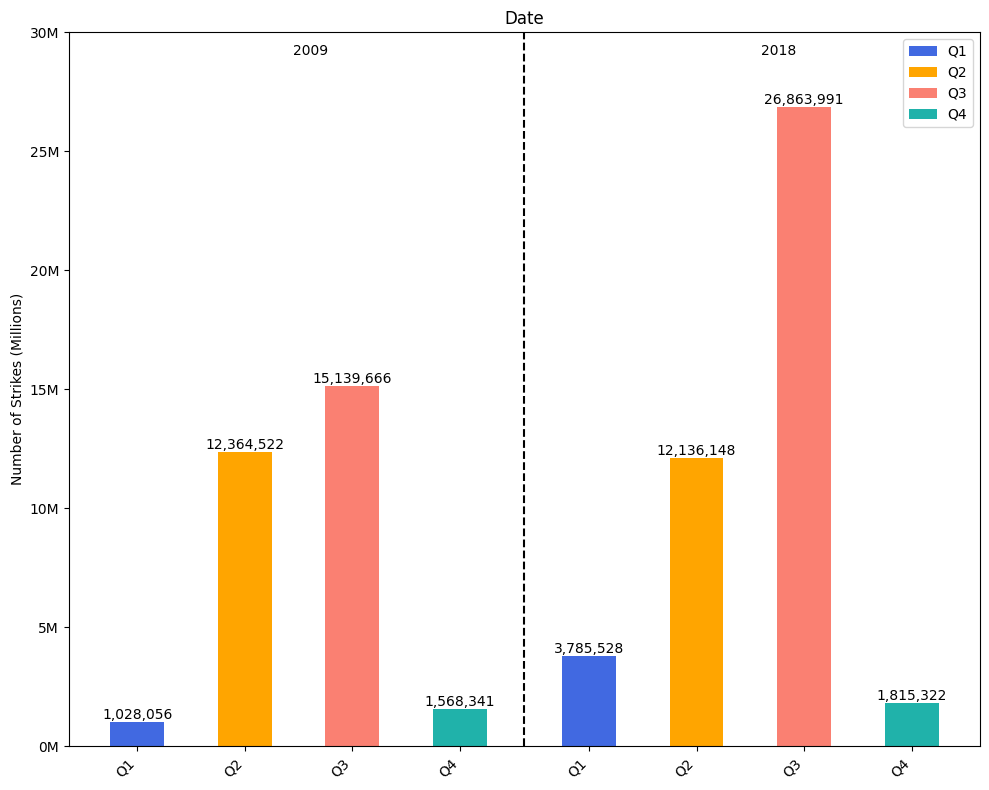

In [56]:
# Step 7: Plot the Bar Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Define the bar width and positions
bar_width = 0.5
quarters = [1, 2, 3, 4]
colors = ['royalblue', 'orange', 'salmon', 'lightseagreen']

# Calculate positions
unique_years = df_grouped['year'].unique()
positions = {}
for i, pos in enumerate(df_grouped['pos']):
    if pos.startswith('2009'):
        positions[pos] = i
    else:
        positions[pos] = i + 0.2  # Adding a larger gap for 2018 positions


for i, quarter in enumerate(quarters):
    quarter_data = df_grouped[df_grouped['quarter'] == quarter]
    bars = ax.bar(
        [positions[pos] for pos in quarter_data['pos']],
        quarter_data['number_of_strikes'],
        bar_width,
        label=f'Q{quarter}',
        color=colors[i]
    )
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

# Set the x-axis labels and positions
ax.set_xticks([positions[pos] for pos in df_grouped['pos']])
ax.set_xticklabels([f'Q{pos.split("-Q")[1]}' for pos in df_grouped['pos']], rotation=45, ha='right')

# Set the labels and title
ax.set_ylabel('Number of Strikes (Millions)')
ax.set_title('Date')
ax.legend()

# Add a vertical line to separate 2009 and 2018
ax.axvline(3.6, color='black', linestyle='--')

# Add label for the years 2009 and 2018 at the top x-axis
ax.text(1.45, ax.get_ylim()[1]*1.03, '2009')
ax.text(5.8, ax.get_ylim()[1]*1.03, '2018')

# Adjust the y-axis limits and labels to show in millions
ax.set_ylim(0, 30e6)

# Set y-ticks explicitly before setting their labels
ax.set_yticks([0, 5e6, 10e6, 15e6, 20e6, 25e6, 30e6])
ax.set_yticklabels([f'{int(y / 1e6)}M' for y in ax.get_yticks()])

# Display the plot
plt.tight_layout()
plt.show()
